In [194]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from scipy.stats import uniform
from numpy import random
from random import sample

In [195]:
!kaggle datasets download abdallahwagih/mall-customers-segmentation

Dataset URL: https://www.kaggle.com/datasets/abdallahwagih/mall-customers-segmentation
License(s): apache-2.0
mall-customers-segmentation.zip: Skipping, found more recently modified local copy (use --force to force download)


In [196]:
with ZipFile("mall-customers-segmentation.zip", "r") as  obj:
    obj.extractall()

In [197]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [198]:
for col in data.columns:
    print(col, data[col].isna().sum())

CustomerID 0
Genre 0
Age 0
Annual Income (k$) 0
Spending Score (1-100) 0


In [199]:
data = data.drop(axis=1, columns='CustomerID')
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


### Visualising the Data

c:\Users\Ashwin V\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


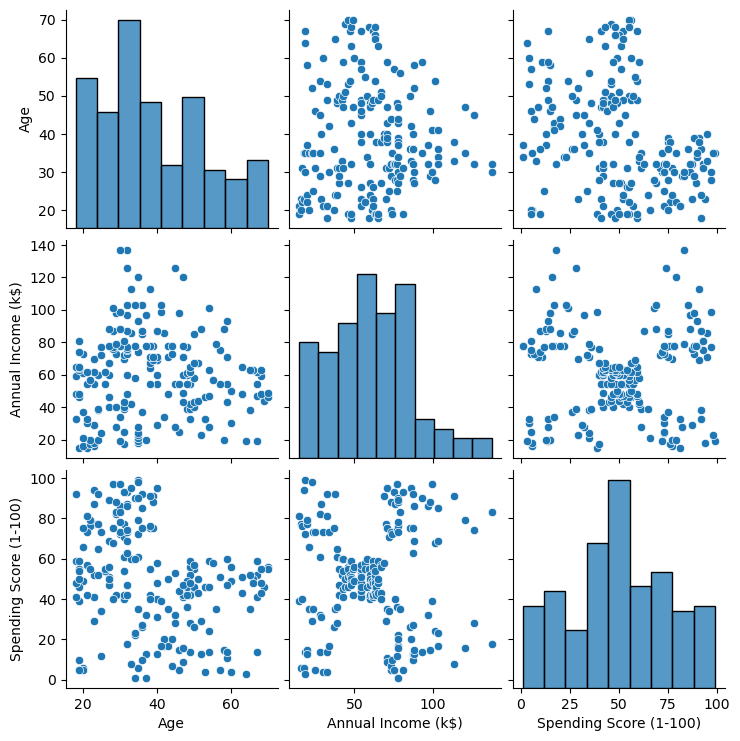

In [200]:
sns.pairplot(data)

### Converting Categorical Variable to Numerical Variable

In [201]:
le = LabelEncoder()
data['Genre'] = le.fit_transform(data['Genre'])
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


### Elbow Method to Identify Number of Clusters

In [202]:
import numpy as np
from random import sample
from sklearn.neighbors import NearestNeighbors
from scipy.stats import uniform

def hopkins_statistic(X):
    X = X.values
    sample_size = int(X.shape[0] * 0.05)
    X_uniform_random_sample = uniform.rvs(loc=X.min(axis=0), scale=X.max(axis=0) - X.min(axis=0), size=(sample_size, X.shape[1]))
    random_indices = sample(range(0, X.shape[0]), sample_size)
    X_sample = X[random_indices]
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs = neigh.fit(X)
    u_distances, u_indices = nbrs.kneighbors(X_uniform_random_sample, n_neighbors=2)
    u_distances = u_distances[:, 0]
    w_distances, w_indices = nbrs.kneighbors(X_sample, n_neighbors=2)
    w_distances = w_distances[:, 1]
    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)
    H = u_sum / (u_sum + w_sum)
    return H


In [203]:
hopkinsValue = hopkins_statistic(data)
hopkinsValue

0.7137413931299376

### Hopkin's Score = 74.81%. Moderate Tendency towards Clustering

### Scaling because Distance is Important for Clustering Algorithms

In [204]:
cols = data.columns
scaler = StandardScaler()
data = scaler.fit_transform(data)
data = pd.DataFrame(data, columns=cols)

### Finding Optimal Number of Clusters using Silhouette Score

c:\Users\Ashwin V\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Ashwin V\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Ashwin V\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


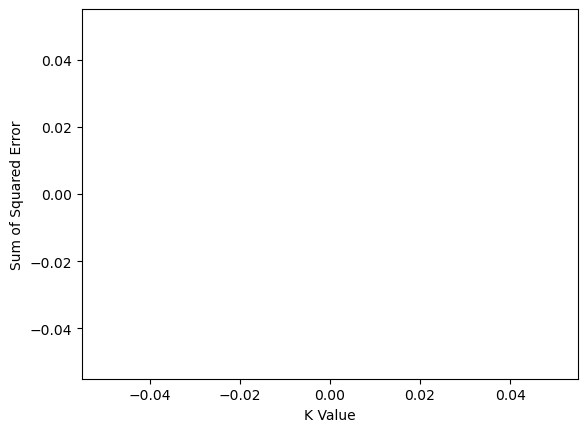

Maxium Silhouette Score : 0.24552487755394126; k Value : 2


In [ ]:
silhouetteScore = []
for i in range(2, 5):
    clusteringModel = GaussianMixture(n_components=i)
    clusteringModel.fit(data)
    pred = clusteringModel.predict(data)
    score = silhouette_score(data, pred)
    silhouetteScore.append(score)

print(f"Maxium Silhouette Score : {max(silhouetteScore)}; k Value : {silhouetteScore.index(max(silhouetteScore)) + 2}")

### Optimal K = 2

### GMM without PCA

In [212]:
gmm = GaussianMixture(n_components=2)
pred = gmm.fit_predict(data)

c:\Users\Ashwin V\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [213]:
pred

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0], dtype=int64)

c:\Users\Ashwin V\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


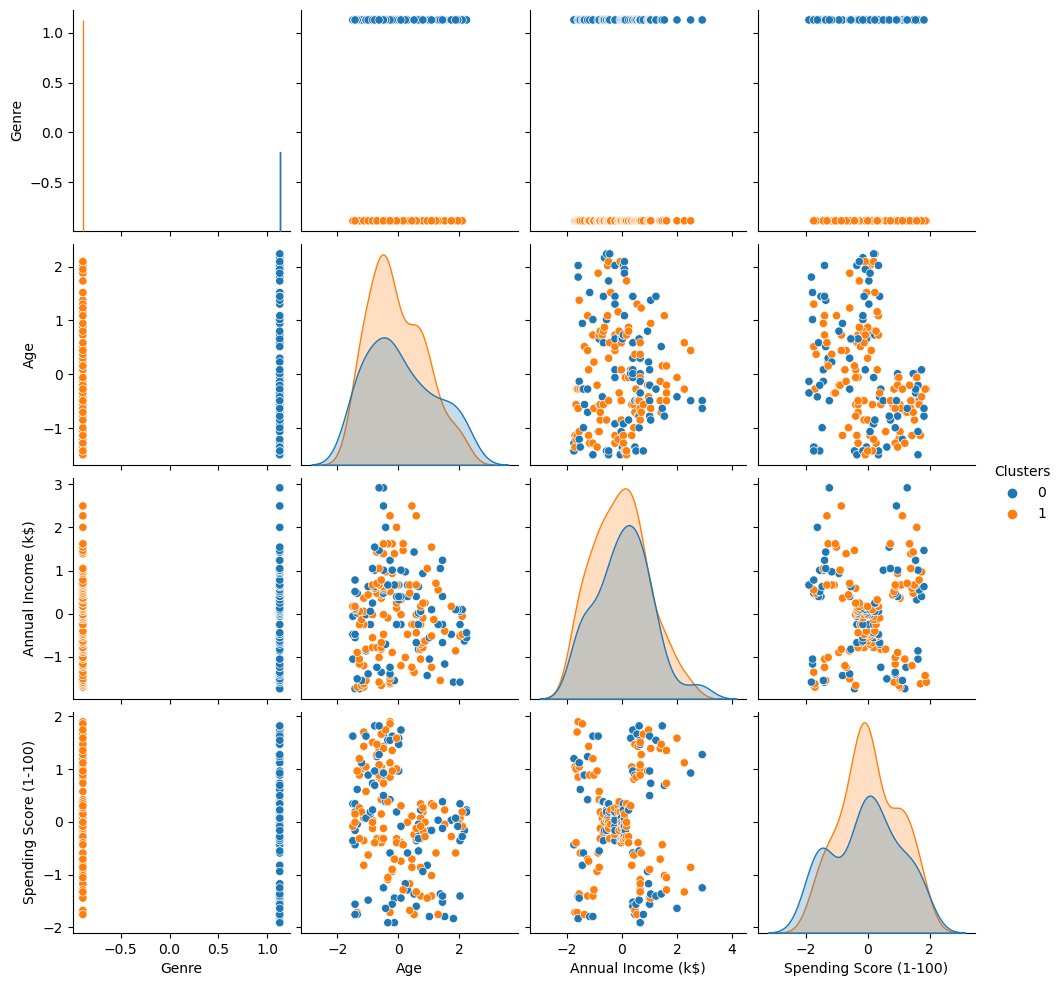

In [218]:
data['Clusters'] = pred
sns.pairplot(data, hue='Clusters')
plt.savefig("Clusters without PCA Reduction")

### GMM after PCA

In [215]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)

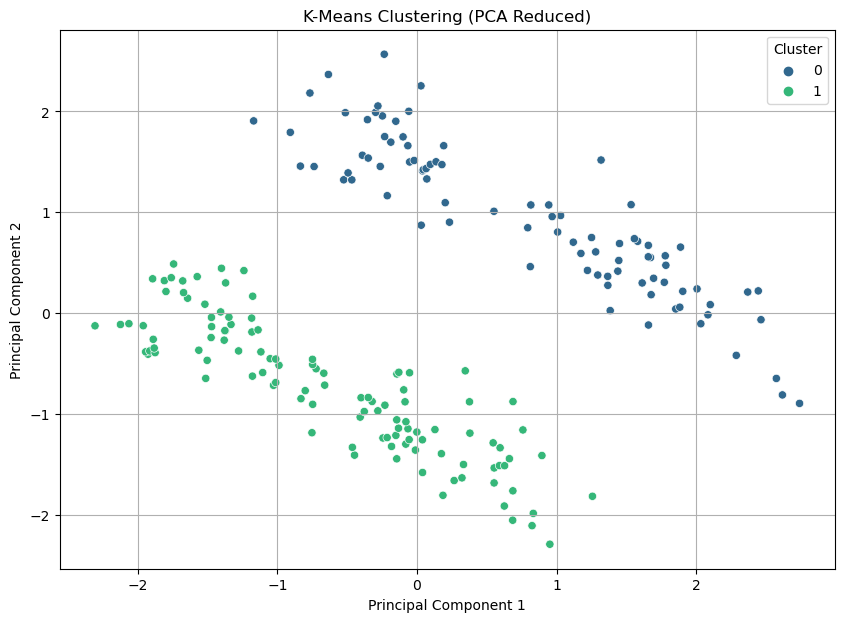

In [217]:
visualization_df = pd.DataFrame(reduced_data, columns=['Principal Component 1', 'Principal Component 2'])
visualization_df['Cluster'] = pred

plt.figure(figsize=(10, 7))
sns.scatterplot(data=visualization_df, x='Principal Component 1', y='Principal Component 2', hue='Cluster', palette='viridis')
plt.title("K-Means Clustering (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster", loc="best")
plt.grid()
plt.savefig("K-Means Clusters after PCA Reduction")
plt.show()
